In [23]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#model packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, classification_report, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate


import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV 

In [2]:
data = pd.read_csv('C:\Education\Kaggle\credit delinq\cs-training.csv')

# Data Exploration

In [3]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
data.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

Missing data
                                        tot        per
Unnamed: 0                                0   0.000000
SeriousDlqin2yrs                          0   0.000000
RevolvingUtilizationOfUnsecuredLines      0   0.000000
age                                       0   0.000000
NumberOfTime30-59DaysPastDueNotWorse      0   0.000000
DebtRatio                                 0   0.000000
MonthlyIncome                         29731  24.720418
NumberOfOpenCreditLinesAndLoans           0   0.000000
NumberOfTimes90DaysLate                   0   0.000000
NumberRealEstateLoansOrLines              0   0.000000
NumberOfTime60-89DaysPastDueNotWorse      0   0.000000
NumberOfDependents                     3924   2.686273


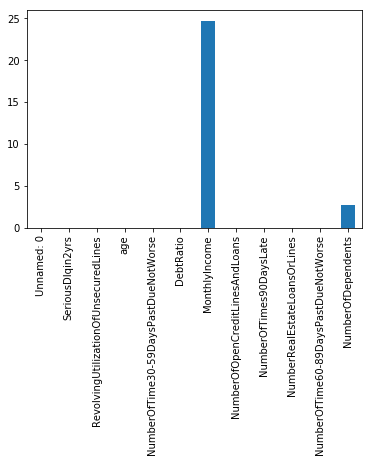

In [5]:
#Missingvalues
tot = data.isnull().sum()
per = (data.isnull().sum()/data.count())*100
missing = pd.concat([tot, per], axis = 1, keys= ['tot', 'per'])
print('Missing data')
print(missing)
missing['per'].plot.bar()

In [6]:
#Missing treatment
data_m = data
# no of dependants - only 3% of data has missing values so treating those customers to 0 dependants
data_m['NumberOfDependents'] = data['NumberOfDependents'].fillna(0)
data_m = data_m.drop('Unnamed: 0', axis = 1)

In [7]:
#Monthly Income replace by MICE
from impyute.imputation.cs import mice
X = data.drop('SeriousDlqin2yrs', axis=1)

imputed = mice(X.values)


In [8]:
data_m['MonthlyIncome'] = imputed[:,5]

In [9]:
#data_m['MonthlyIncome'] = imputed
print(data['MonthlyIncome'].describe())
print(data_m['MonthlyIncome'].describe())

count    1.500000e+05
mean     6.195523e+03
std      1.305695e+04
min     -3.433751e+05
25%      3.432473e+03
50%      5.000000e+03
75%      7.434000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64
count    1.500000e+05
mean     6.195523e+03
std      1.305695e+04
min     -3.433751e+05
25%      3.432473e+03
50%      5.000000e+03
75%      7.434000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64


In [10]:
#Missingvalues
tot = data.isnull().sum()
per = (data.isnull().sum()/data.count())*100
missing = pd.concat([tot, per], axis = 1, keys= ['tot', 'per'])
print('Missing data')
print(missing)

Missing data
                                      tot  per
Unnamed: 0                              0  0.0
SeriousDlqin2yrs                        0  0.0
RevolvingUtilizationOfUnsecuredLines    0  0.0
age                                     0  0.0
NumberOfTime30-59DaysPastDueNotWorse    0  0.0
DebtRatio                               0  0.0
MonthlyIncome                           0  0.0
NumberOfOpenCreditLinesAndLoans         0  0.0
NumberOfTimes90DaysLate                 0  0.0
NumberRealEstateLoansOrLines            0  0.0
NumberOfTime60-89DaysPastDueNotWorse    0  0.0
NumberOfDependents                      0  0.0


In [11]:
#Monthly Income has no negative value so impute that to 0
MI =  data_m['MonthlyIncome']

MI = [0 if MonthlyIncome < 0 else MonthlyIncome for MonthlyIncome in MI]
data_m['MonthlyIncome'] = MI

In [12]:
#data_m['MonthlyIncome'] = imputed
print(data['MonthlyIncome'].describe())
print(data_m['MonthlyIncome'].describe())

count    1.500000e+05
mean     6.214276e+03
std      1.292778e+04
min      0.000000e+00
25%      3.432473e+03
50%      5.000000e+03
75%      7.434000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64
count    1.500000e+05
mean     6.214276e+03
std      1.292778e+04
min      0.000000e+00
25%      3.432473e+03
50%      5.000000e+03
75%      7.434000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64


   SeriousDlqin2yrs percent
0            139974   93.3%
1             10026    6.7%


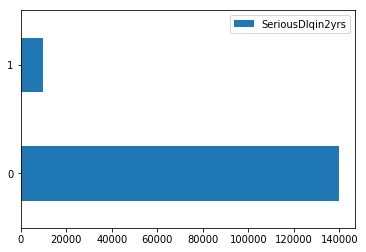

In [13]:
target = pd.DataFrame(data['SeriousDlqin2yrs'].value_counts())
target['percent'] = ((target['SeriousDlqin2yrs']/target['SeriousDlqin2yrs'].sum())*100).round(1).astype(str)+'%'
print(target)
target.plot.barh()

Highly unbalanced target variable to -Precision Recallcurves need to be used as metrics to assess models

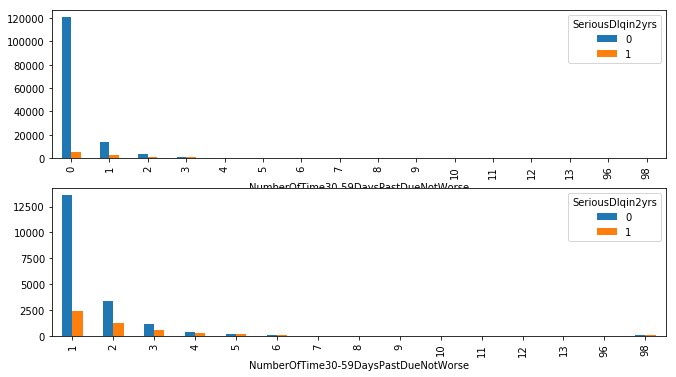

In [9]:
#plot data- 'NumberOfTime30-59DaysPastDueNotWorse'
dat = data[data['NumberOfTime30-59DaysPastDueNotWorse'] > 0]
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(11,6))
#data.groupby(['NumberOfTime30-59DaysPastDueNotWorse','SeriousDlqin2yrs']).count()['SeriousDlqin2yrs'].unstack.plot(ax=ax, x = 'NumberOfTime30-59DaysPastDueNotWorse', legend = True, kind = 'bar')
#data.groupby('NumberOfTime30-59DaysPastDueNotWorse')['SeriousDlqin2yrs'].value_counts().unstack
#.plot(ax=ax, x = 'NumberOfTime30-59DaysPastDueNotWorse', legend = True, kind = 'bar')
pd.crosstab(data['NumberOfTime30-59DaysPastDueNotWorse'], data['SeriousDlqin2yrs']).plot(ax=ax1,  kind = 'bar')
pd.crosstab(dat['NumberOfTime30-59DaysPastDueNotWorse'], dat['SeriousDlqin2yrs']).plot(ax=ax2,  kind = 'bar')


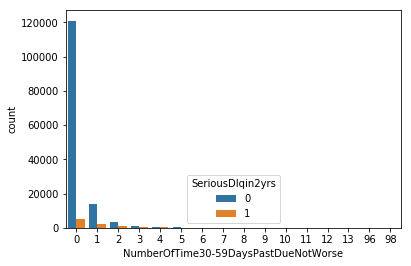

In [10]:
sns.countplot(x='NumberOfTime30-59DaysPastDueNotWorse' , data = data ,hue ='SeriousDlqin2yrs')

In [11]:
def boxplots_routine(x1, y1, da,palette="PRGn"):
    print(y1)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    s=sns.boxplot(ax = ax1, x = x1, y =y1, hue = "SeriousDlqin2yrs" , data = da,palette="PRGn",showfliers=True)
    s=sns.boxplot(ax = ax2, x = x1, y =y1, hue = "SeriousDlqin2yrs" , data = da,palette="PRGn",showfliers=False)
    plt.show();

RevolvingUtilizationOfUnsecuredLines


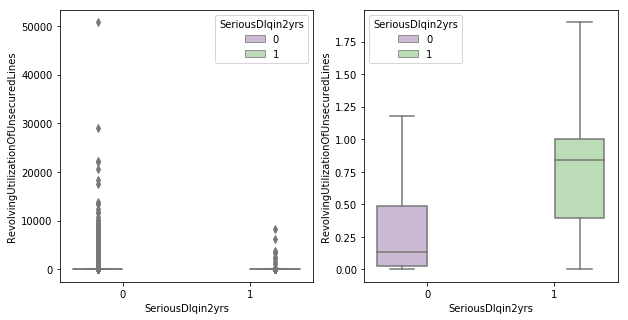

age


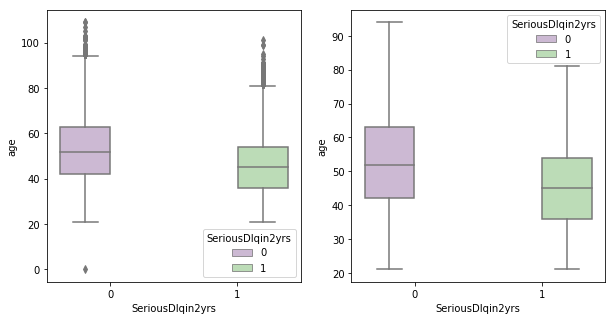

DebtRatio


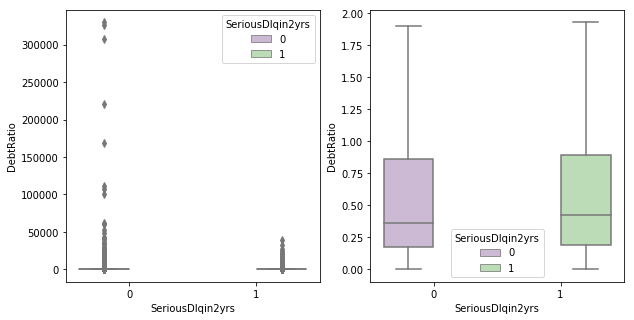

MonthlyIncome


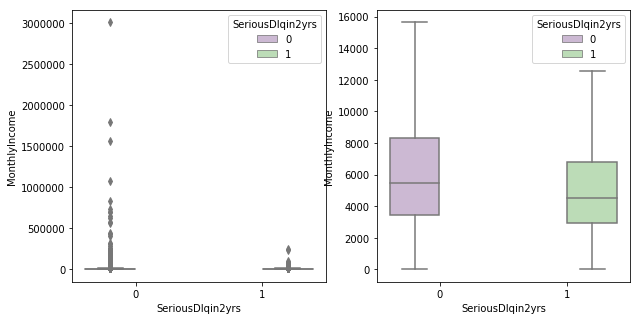

NumberOfOpenCreditLinesAndLoans


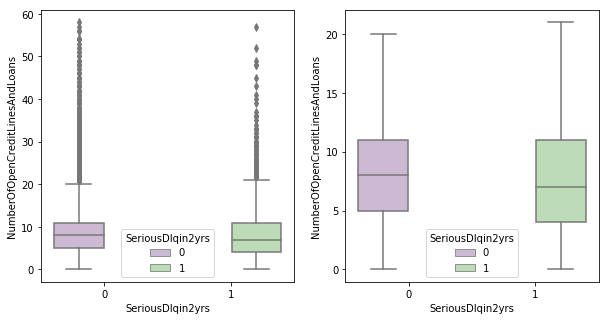

In [12]:
boxplots_routine("SeriousDlqin2yrs","RevolvingUtilizationOfUnsecuredLines", data)
boxplots_routine("SeriousDlqin2yrs","age", data)
boxplots_routine("SeriousDlqin2yrs","DebtRatio", data)
boxplots_routine("SeriousDlqin2yrs","MonthlyIncome", data)
boxplots_routine("SeriousDlqin2yrs","NumberOfOpenCreditLinesAndLoans", data)

NumberOfDependents


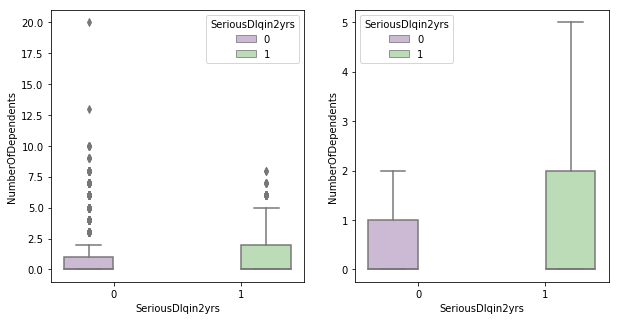

NumberOfTimes90DaysLate


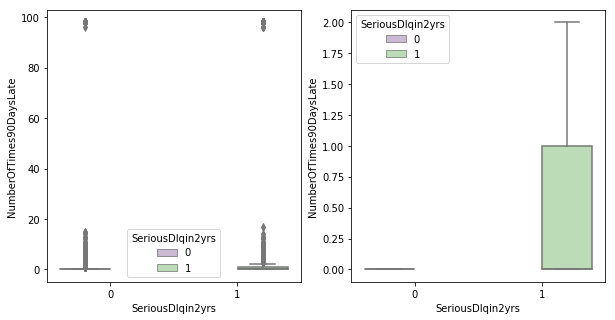

NumberOfTime60-89DaysPastDueNotWorse


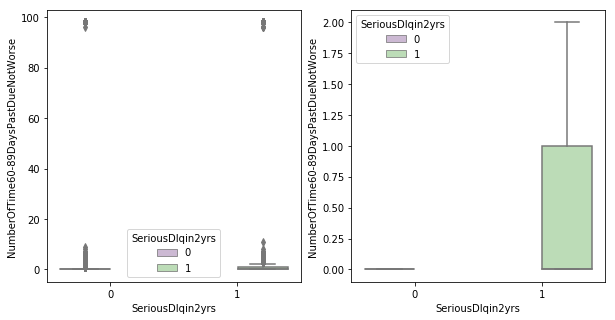

In [13]:
boxplots_routine("SeriousDlqin2yrs","NumberOfDependents", data)
boxplots_routine("SeriousDlqin2yrs","NumberOfTimes90DaysLate", data)
boxplots_routine("SeriousDlqin2yrs","NumberOfTime60-89DaysPastDueNotWorse", data)

In [ ]:
#Montly income
x = data['MonthlyIncome'].value_counts(sort = True).to_frame()
x.head()
sns.countplot(x='MonthlyIncome' , data = data ,hue ='SeriousDlqin2yrs')
#sns.countplot(x='MonthlyIncome' , data = data ,hue ='SeriousDlqin2yrs',showfliers=True)

In [ ]:
sns.countplot(x='NumberOfDependents' , data = data ,hue ='SeriousDlqin2yrs')

In [ ]:
#Scatter plot for delinquency periods
#trunc data
da = data[data['NumberOfTime30-59DaysPastDueNotWorse'] < 80]
da= da[da['NumberOfTime60-89DaysPastDueNotWorse'] < 80]
da= da[da['NumberOfTimes90DaysLate'] < 80]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
sx = sns.scatterplot(ax =ax1, x="NumberOfTime30-59DaysPastDueNotWorse", y="NumberOfTime60-89DaysPastDueNotWorse", hue="SeriousDlqin2yrs",
                     data=da)
sx = sns.scatterplot(ax =ax2, x="NumberOfTimes90DaysLate", y="NumberOfTime60-89DaysPastDueNotWorse", hue="SeriousDlqin2yrs",
                     data=da)
plt.show();

In [ ]:
#Scatter plot for income and delinq periods
#trunc data - upto few quartiles
da = data[data['MonthlyIncome'] < 16000]
da = da[da['NumberOfTimes90DaysLate'] < 80]
sx = sns.scatterplot(x="NumberOfTimes90DaysLate", y="MonthlyIncome", hue="SeriousDlqin2yrs",
                     data=da)
plt.show();

In [ ]:
variable = data.columns
variable

In [ ]:
# Density plot
variable = data.columns.values

i=0
f0 = data[data['SeriousDlqin2yrs'] == 0]
f1 = data[data['SeriousDlqin2yrs'] == 1]

plt.figure()
fig, ax = plt.subplots(4,3, figsize = (18,28))


for feature in variable:
    i += 1
    plt.subplot(4,3,i)
    sns.kdeplot(f0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(f1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [ ]:
# Correlation 
plt.figure(figsize=(11,11))
cor = data.corr()
sns.heatmap(cor, linewidths=.1,cmap="Reds")

# Dimensionality Reduction and Clustering

In [ ]:
from sklearn.manifold import TSNE

X = data_m.drop('SeriousDlqin2yrs', axis=1)
y = data_m['SeriousDlqin2yrs']


# T-SNE Implementation
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# PCA Implementation
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# Model

In [20]:
target = 'SeriousDlqin2yrs'
predictors = data.iloc[:,2:11].columns.values

#Test train split
train, valid = train_test_split(data_m, test_size = 0.2, random_state = 2018, shuffle = True)

In [ ]:
Rand forest
xgb
neural net
knn
anamoly
maybe PCA?

### Random Forest

In [23]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [24]:
clf.fit(train[predictors], train[target].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

In [25]:
preds = clf.predict(valid[predictors])

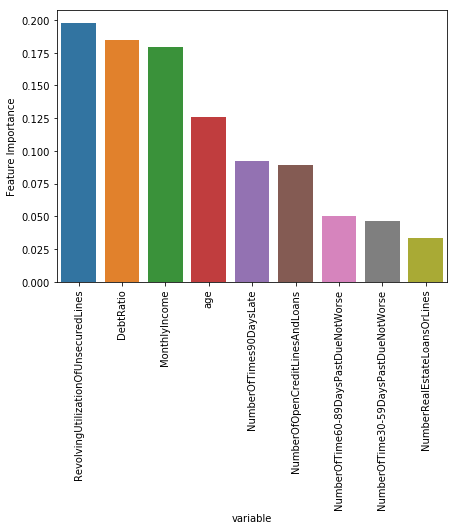

In [26]:
#Feature Importances
tmp = pd.DataFrame({'variable':predictors, 'Feature Importance':clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
plt.figure(figsize = (7,5))
chart = sns.barplot(x = 'variable', y = 'Feature Importance', data = tmp)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show();

Accuracy score: 0.9368666666666666
Confusion matrix:
       0    1
0  27734  331
1   1563  372

 Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28065
           1       0.53      0.19      0.28      1935

    accuracy                           0.94     30000
   macro avg       0.74      0.59      0.62     30000
weighted avg       0.92      0.94      0.92     30000


 Precision Recall curve and ROC curve:


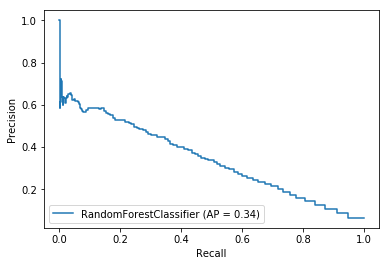

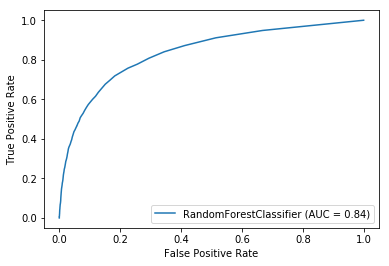

In [42]:
#Model metrics
print("Accuracy score:", accuracy_score(valid[target].values,preds))
print("Confusion matrix:")
print(pd.DataFrame(confusion_matrix(valid[target],preds)))
print("\n Classification report:")
print(classification_report(valid[target], preds))
print("\n Precision Recall curve and ROC curve:")
plot_precision_recall_curve(clf,valid[predictors], valid[target])
plot_roc_curve(clf,valid[predictors],valid[target])

### XGBoost with parameter tuning

In [59]:
dtrain = xgb.DMatrix(data[predictors], data[target].values)
dvalid = xgb.DMatrix(valid[predictors], valid[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'aucpr'
params['random_state'] = 2019

In [60]:
model = xgb.train(params, 
                dtrain, 
                10000, 
                watchlist, 
                early_stopping_rounds=50, 
                maximize=True, 
                verbose_eval=200)

[0]	train-aucpr:0.297178	valid-aucpr:0.294037
Multiple eval metrics have been passed: 'valid-aucpr' will be used for early stopping.

Will train until valid-aucpr hasn't improved in 50 rounds.
[200]	train-aucpr:0.394115	valid-aucpr:0.387153
[400]	train-aucpr:0.40412	valid-aucpr:0.396651
[600]	train-aucpr:0.408716	valid-aucpr:0.401438
[800]	train-aucpr:0.412347	valid-aucpr:0.405296
[1000]	train-aucpr:0.415691	valid-aucpr:0.408612
[1200]	train-aucpr:0.418976	valid-aucpr:0.411728
[1400]	train-aucpr:0.42216	valid-aucpr:0.415558
[1600]	train-aucpr:0.425454	valid-aucpr:0.419082
[1800]	train-aucpr:0.428174	valid-aucpr:0.421908
[2000]	train-aucpr:0.431161	valid-aucpr:0.425454
[2200]	train-aucpr:0.433911	valid-aucpr:0.427878
[2400]	train-aucpr:0.436383	valid-aucpr:0.430664
[2600]	train-aucpr:0.438681	valid-aucpr:0.433366
[2800]	train-aucpr:0.440815	valid-aucpr:0.435478
[3000]	train-aucpr:0.442769	valid-aucpr:0.437196
[3200]	train-aucpr:0.444878	valid-aucpr:0.439538
[3400]	train-aucpr:0.44715	va

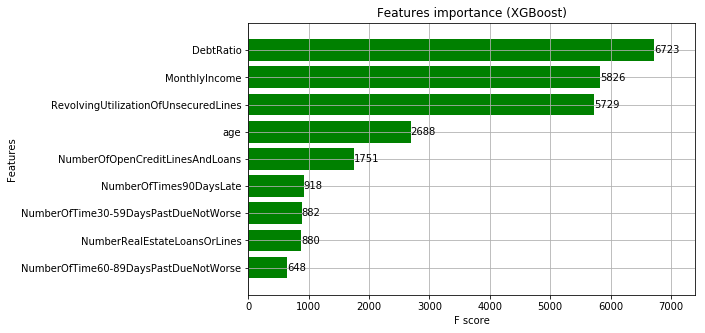

In [61]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

Accuracy score: 0.8898446804230303
Confusion matrix:
[[27846   219]
 [ 1446   489]]

 Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28065
           1       0.69      0.25      0.37      1935

    accuracy                           0.94     30000
   macro avg       0.82      0.62      0.67     30000
weighted avg       0.93      0.94      0.93     30000


 Precision Recall curve


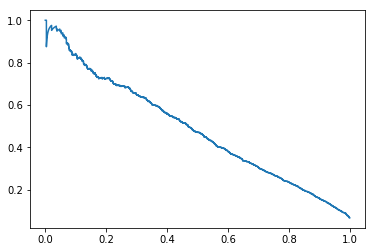

In [102]:
preds = model.predict(dvalid)
print("Accuracy score:", roc_auc_score(valid[target].values, preds))
print("Confusion matrix:")
print(confusion_matrix(valid[target], (preds>0.5)))
print("\n Classification report:")
print(classification_report(valid[target], (preds>0.5)))
print("\n Precision Recall curve")
precision, recall, thresholds =  precision_recall_curve(valid[target], preds)
plt.plot(recall, precision)


 ROC curve:


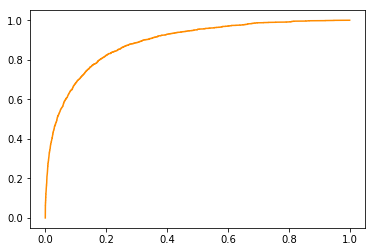

In [103]:
print("\n ROC curve:")
fpr, tpr,ad  = roc_curve(valid[target], preds)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc_score(valid[target], preds))

### XGB - Hyper parameter tuning

In [128]:
# Cross validation function:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['SeriousDlqin2yrs'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='aucpr', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['SeriousDlqin2yrs'],eval_metric='aucpr')
    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\n Model Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['SeriousDlqin2yrs'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['SeriousDlqin2yrs'], dtrain_predprob))
    print("Classification Report: \n", classification_report(valid['SeriousDlqin2yrs'], (preds>0.5)))

    
    fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
    xgb.plot_importance(alg, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
    plt.show()


 Model Report
Accuracy : 0.9394
AUC Score (Train): 0.873363
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     28065
           1       0.69      0.25      0.37      1935

    accuracy                           0.94     30000
   macro avg       0.82      0.62      0.67     30000
weighted avg       0.93      0.94      0.93     30000



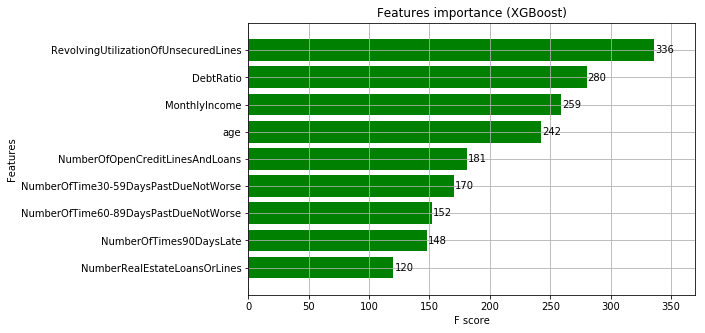

In [129]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, data, predictors)

In [131]:
# Max depth and min child weight
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(data[predictors],data['SeriousDlqin2yrs'])


IndentationError: unexpected indent (<ipython-input-131-858931c4720b>, line 10)

In [133]:
gsearch1.cv_results_

{'mean_fit_time': array([20.94858279, 21.32654829, 20.97724352, 36.53072596, 32.20859179,
        31.57931347, 45.61112261, 42.84003549, 42.48081493, 60.80613999,
        55.67693381, 48.49992337]),
 'std_fit_time': array([0.17437044, 0.60802418, 0.74600601, 1.69184748, 0.64456366,
        0.27201273, 0.64000375, 0.39594256, 0.39155864, 1.41300628,
        0.4268885 , 6.69954426]),
 'mean_score_time': array([0.18410864, 0.16196709, 0.16635599, 0.19448037, 0.21292238,
        0.20409827, 0.26958809, 0.2579845 , 0.26579237, 0.36562333,
        0.33175159, 0.30059757]),
 'std_score_time': array([0.04005548, 0.02092101, 0.01955809, 0.01741147, 0.00707736,
        0.03247704, 0.02011068, 0.01211575, 0.01393168, 0.01414015,
        0.01046521, 0.02227095]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             

In [132]:
gsearch1.best_params_, gsearch1.best_score_
# Max depth and min child weight - can do even lower for max depth but stopping here for now

({'max_depth': 3, 'min_child_weight': 3}, 0.8652667929375424)

In [135]:
#Tune gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(3,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(data[predictors],data['SeriousDlqin2yrs'])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

C:\Users\sadha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([20.6047061 , 21.33375778, 20.93123307, 20.75341434, 20.47609315,
         21.34626708, 18.46574488]),
  'std_fit_time': array([0.30560074, 0.21300214, 0.31791108, 0.0900267 , 0.44755225,
         0.21321406, 2.48686704]),
  'mean_score_time': array([0.16316366, 0.18989248, 0.16954694, 0.16565371, 0.15580788,
         0.15856113, 0.16675415]),
  'std_score_time': array([0.01356606, 0.0189701 , 0.02178695, 0.02457495, 0.01863239,
         0.01807196, 0.04237609]),
  'param_gamma': masked_array(data=[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.3},
   {'gamma': 0.4},
   {'gamma': 0.5},
   {'gamma': 0.6},
   {'gamma': 0.7},
   {'gamma': 0.8},
   {'gamma': 0.9}],
  'split0_test_score': array([0.86365931, 0.86365931, 0.86366066, 0.8636929 , 0.8636929 ,
         0.8636929 , 0.86365018]),
  'split1_test_score': array([0.86098627,


 Model Report
Accuracy : 0.9386
AUC Score (Train): 0.872324
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     28065
           1       0.69      0.25      0.37      1935

    accuracy                           0.94     30000
   macro avg       0.82      0.62      0.67     30000
weighted avg       0.93      0.94      0.93     30000



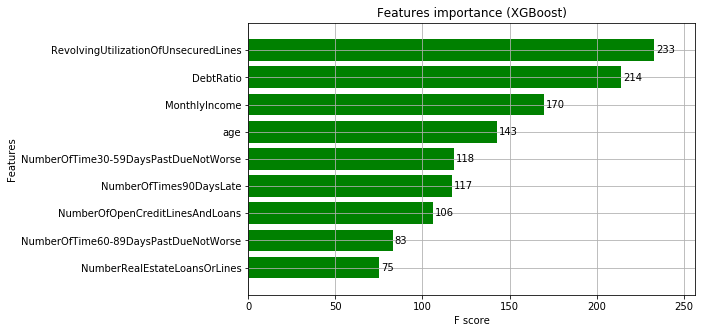

In [136]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma= 0.8,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, data, predictors)

In [137]:
#Tune subsample and colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(data[predictors],data['SeriousDlqin2yrs'])


C:\Users\sadha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


AttributeError: 'GridSearchCV' object has no attribute 'cv_results'

In [138]:
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([29.54131885, 29.07770514, 29.24312849, 28.48679934, 32.15526128,
         31.17999825, 28.58969908, 28.06161027, 34.53561549, 33.82429872,
         33.09008727, 32.62390032, 36.57375407, 36.7962173 , 36.36516747,
         35.45249329]),
  'std_fit_time': array([0.36763208, 0.39477753, 0.65547179, 0.73722847, 0.19774876,
         0.49235305, 1.96834552, 0.91438245, 0.13320716, 0.14995752,
         0.2464694 , 0.30395486, 0.2386932 , 0.54247535, 0.40363946,
         0.2796485 ]),
  'mean_score_time': array([0.26937361, 0.23571901, 0.26547322, 0.23746958, 0.21606073,
         0.22347369, 0.24086318, 0.20105581, 0.22663832, 0.2040554 ,
         0.2405942 , 0.25522008, 0.23899512, 0.23406277, 0.25259538,
         0.17698579]),
  'std_score_time': array([0.06329399, 0.05320455, 0.05908419, 0.03467962, 0.01059512,
         0.02561242, 0.05182398, 0.00751878, 0.0275928 , 0.01573918,
         0.03282747, 0.02629069, 0.00937049, 0.04046604, 0.04151716,
         0.029448

In [145]:
#Tuning Regularization Parameters
param_test6 = {
 'reg_alpha':[1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=3,
 min_child_weight=3, gamma=0.8, subsample=0.7, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])

C:\Users\sadha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0.8,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=3,
                                     missing=None, n_estimators=177, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.7, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'reg_alpha': [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', ver

In [146]:
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([21.47358494, 21.2641304 , 21.31925697, 20.83070397, 21.20280547,
         22.00995121, 18.56396461]),
  'std_fit_time': array([0.1777198 , 0.28192315, 0.27908232, 0.16193654, 0.37870396,
         0.13506058, 2.48536081]),
  'mean_score_time': array([0.15612397, 0.14397454, 0.14309072, 0.16456189, 0.15052652,
         0.16037183, 0.13264594]),
  'std_score_time': array([0.02865485, 0.01770391, 0.0158922 , 0.02470642, 0.02075099,
         0.02245618, 0.02603066]),
  'param_reg_alpha': masked_array(data=[1, 1.25, 1.5, 1.75, 2, 2.25, 2.5],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1},
   {'reg_alpha': 1.25},
   {'reg_alpha': 1.5},
   {'reg_alpha': 1.75},
   {'reg_alpha': 2},
   {'reg_alpha': 2.25},
   {'reg_alpha': 2.5}],
  'split0_test_score': array([0.86210442, 0.86199892, 0.86240831, 0.86263993, 0.8623423 ,
         0.86235069, 0.86194368]),
  'split1_t


 Model Report
Accuracy : 0.9384
AUC Score (Train): 0.870737
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     28065
           1       0.69      0.25      0.37      1935

    accuracy                           0.94     30000
   macro avg       0.82      0.62      0.67     30000
weighted avg       0.93      0.94      0.93     30000



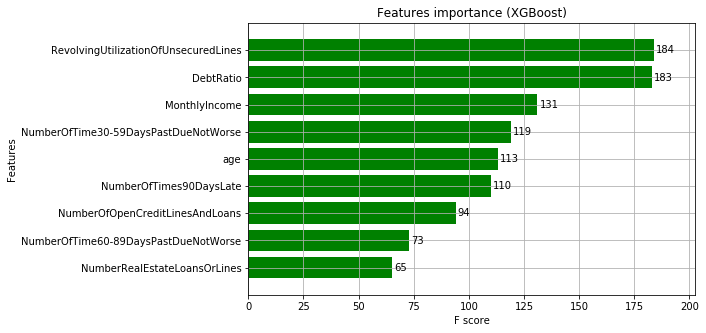

In [147]:
#final model with tuned parameters
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma= 0.8,
 subsample=0.7,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,reg_alpha = 2.25,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, data, predictors)

### Anamoly Detection Method

In [148]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [151]:
Fraud = data[data['SeriousDlqin2yrs']==1]
Valid = data[data['SeriousDlqin2yrs']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
outlier_fraction

0.07162758798062498

In [158]:
state = np.random.RandomState(42)
X = data[predictors]
Y = data['SeriousDlqin2yrs']

In [ ]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)   
}

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 13639
Accuracy Score :
0.9090733333333333
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    139974
           1       0.33      0.36      0.34     10026

    accuracy                           0.91    150000
   macro avg       0.64      0.65      0.65    150000
weighted avg       0.91      0.91      0.91    150000

Local Outlier Factor: 18035
Accuracy Score :
0.8797666666666667
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.93      0.94    139974
           1       0.13      0.14      0.13     10026

    accuracy                           0.88    150000
   macro avg       0.53      0.53      0.53    150000
weighted avg       0.88      0.88      0.88    150000



### KNN Classifier

In [21]:
train_pred_m, valid_pred_m, train_tar_m, valid_tar_m = train_test_split(data_m[predictors],data_m['SeriousDlqin2yrs'], test_size = 0.2, random_state = 2018, shuffle = True)

In [22]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_pred_m)

X_train = scaler.transform(train_pred_m)
X_test = scaler.transform(valid_pred_m)

In [24]:
#finding the best K value by  plotting against error rate
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, train_tar_m)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != valid_tar_m))

Text(0, 0.5, 'Mean Error')

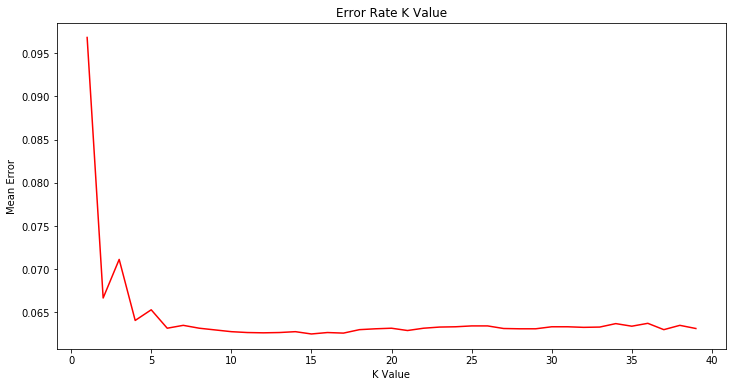

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [28]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, train_tar_m)
preds = knn.predict(X_test)

In [30]:
print("Accuracy Score :")
print(accuracy_score(valid_tar_m,preds))
print("Classification Report :")
print(classification_report(valid_tar_m,preds))
print("Confusion Matrix :")
print(confusion_matrix(valid_tar_m, preds))

Accuracy Score :
0.9368333333333333
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     28065
           1       0.56      0.10      0.16      1935

    accuracy                           0.94     30000
   macro avg       0.75      0.55      0.57     30000
weighted avg       0.92      0.94      0.92     30000

Confusion Matrix :
[[27919   146]
 [ 1749   186]]


### Logistic Regression - No missing values, outlier treatment and scale all values

In [36]:
#train_pred_m, valid_pred_m, train_tar_m, valid_tar_m
#X_test,X_train
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, train_tar_m) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
preds = classifier.predict(X_test)

Accuracy score: 0.936
Confusion matrix:
       0   1
0  28005  60
1   1860  75

 Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28065
           1       0.56      0.04      0.07      1935

    accuracy                           0.94     30000
   macro avg       0.75      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000


 Precision Recall curve and ROC curve:


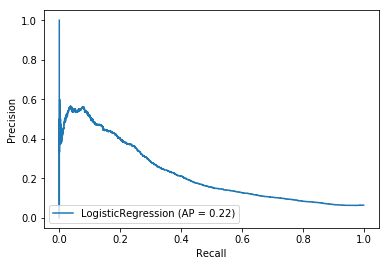

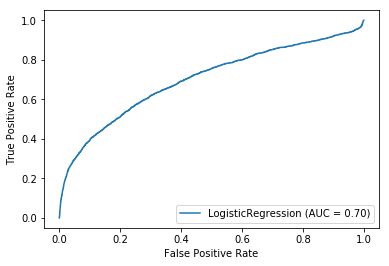

In [40]:
#Model metrics
print("Accuracy score:", accuracy_score(valid_tar_m,preds))
print("Confusion matrix:")
print(pd.DataFrame(confusion_matrix(valid_tar_m,preds)))
print("\n Classification report:")
print(classification_report(valid_tar_m, preds))
print("\n Precision Recall curve and ROC curve:")
plot_precision_recall_curve(classifier,X_test, valid_tar_m)
plot_roc_curve(classifier,X_test, valid_tar_m)

### Neural Networks - with one hidden layer